In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [16]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [17]:
df = pd.read_csv("dog_breeds.csv")
df

,Breed,Country of Origin,Fur Color,Height (in),Color of Eyes,Longevity (yrs),Character Traits,Common Health Problems
0,Labrador Retriever,Canada,"Yellow, Black, Chocolate",21-24,Brown,10-12,"Loyal, friendly, intelligent, energetic, good-...","Hip dysplasia, obesity, ear infections"
1,German Shepherd,Germany,"Black, Tan",22-26,Brown,7-10,"Loyal, intelligent, protective, confident, tra...","Hip dysplasia, elbow dysplasia, pancreatitis"
2,Bulldog,England,"White, Red",12-16,Brown,8-10,"Loyal, calm, gentle, brave","Skin allergies, respiratory issues, obesity"
3,Poodle,France,"White, Black, Brown, Apricot",10-15,"Brown, Blue",12-15,"Intelligent, active, affectionate, hypoallergenic","Hip dysplasia, epilepsy, bladder stones"
4,Beagle,England,"White, Tan, Red, Lemon",13-15,Brown,12-15,"Curious, friendly, energetic, good-natured","Ear infections, hip dysplasia, epilepsy"
...,...,...,...,...,...,...,...,...
112,Catahoula Leopard Dog,United States,"Merle, Black",20-26,Brown,12-14,"Intelligent, energetic, good-natured, loyal","Dental problems, eye issues, skin allergies"
113,Cocker Spaniel,England,"Black, Brown",14-15,Brown,12-15,"Intelligent, energetic, playful, good-natured","Dental problems, eye issues, skin allergies"
114,Miniature Shiba Inu,Japan,"Red, Sesame",13-16,Brown,12-15,"Intelligent, energetic, playful, good-natured","Dental problems, eye issues, skin allergies"
115,Belgian Tervuren,Belgium,Fawn,22-26,Brown,12-14,"Intelligent, energetic, good-natured, loyal","Dental problems, eye issues, skin allergies"


In [18]:
df.columns

Index(['Breed', 'Country of Origin', 'Fur Color', 'Height (in)',
       'Color of Eyes', 'Longevity (yrs)', 'Character Traits',
       'Common Health Problems'],
      dtype='object')

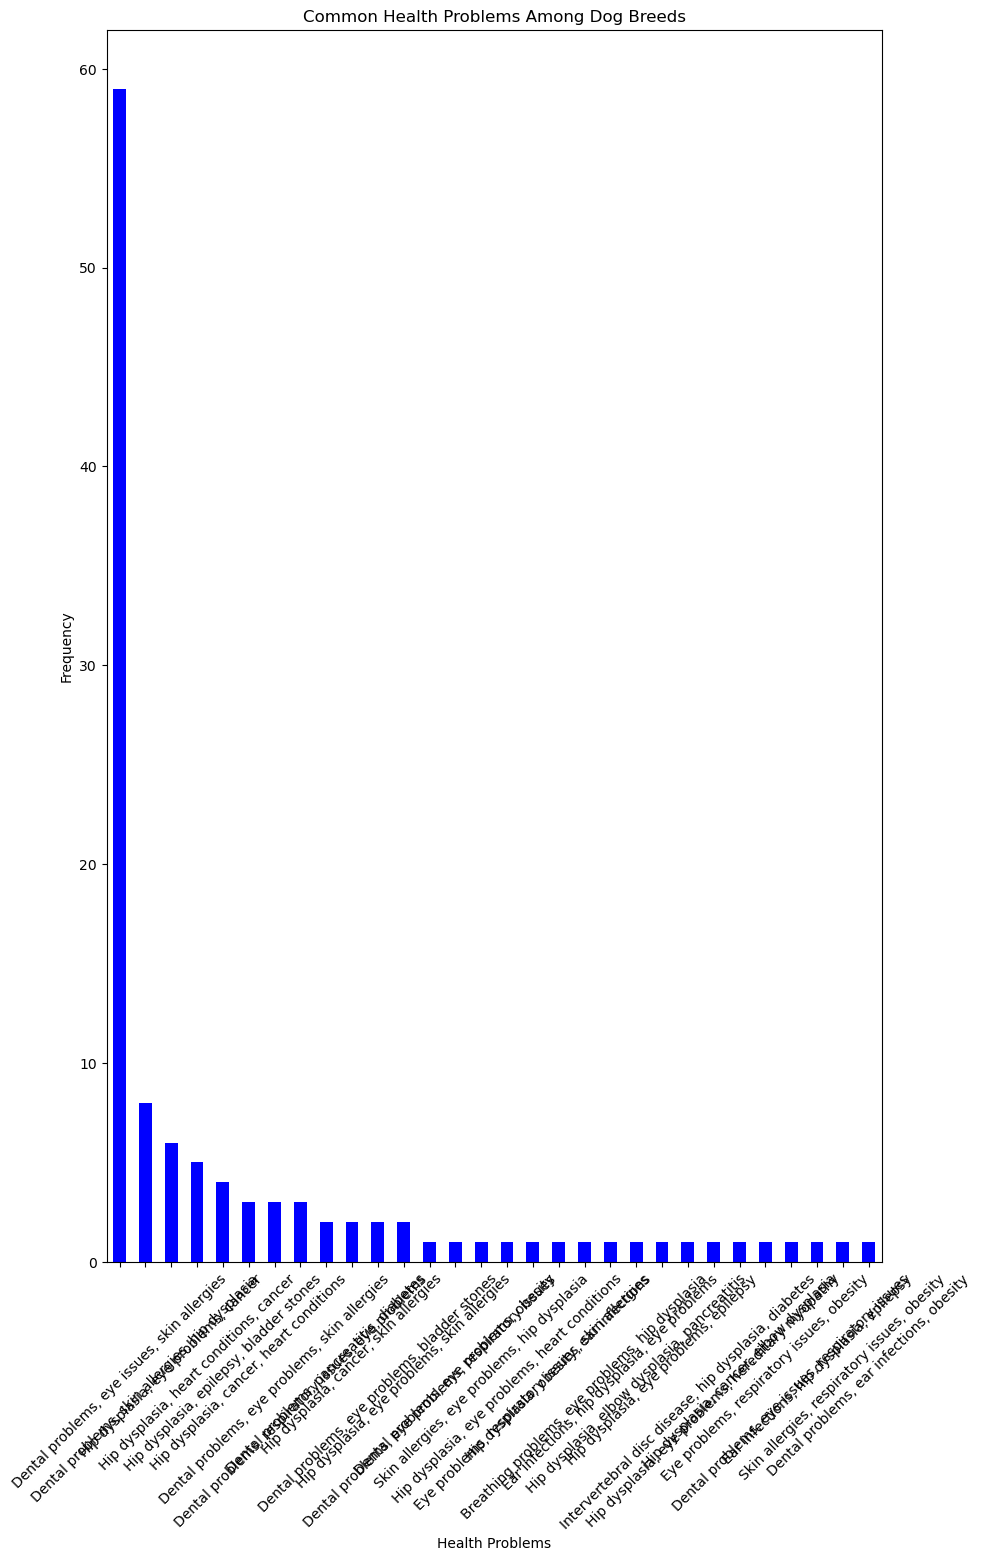

In [19]:
import matplotlib.pyplot as plt

# Plot bar chart of common health problems
plt.figure(figsize=(10, 16))
df['Common Health Problems'].value_counts().plot(kind='bar', color='blue')
plt.title('Common Health Problems Among Dog Breeds')
plt.xlabel('Health Problems')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


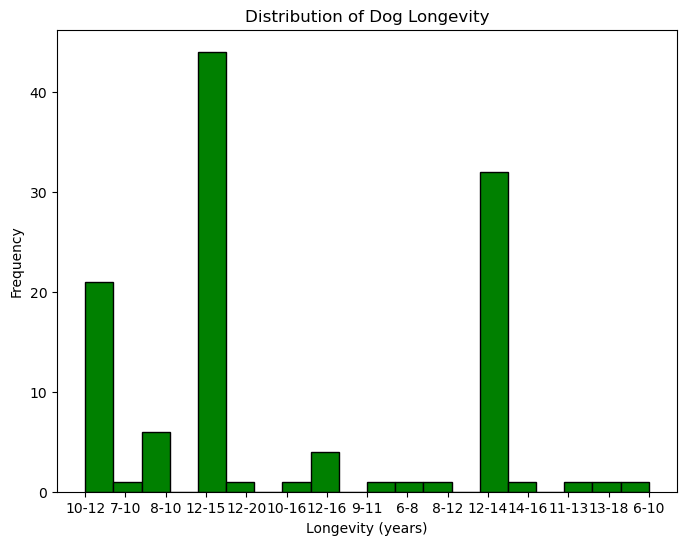

In [20]:
# Plot histogram of longevity distribution
plt.figure(figsize=(8, 6))
plt.hist(df['Longevity (yrs)'], bins=20, color='green', edgecolor='black')
plt.title('Distribution of Dog Longevity')
plt.xlabel('Longevity (years)')
plt.ylabel('Frequency')
plt.show()


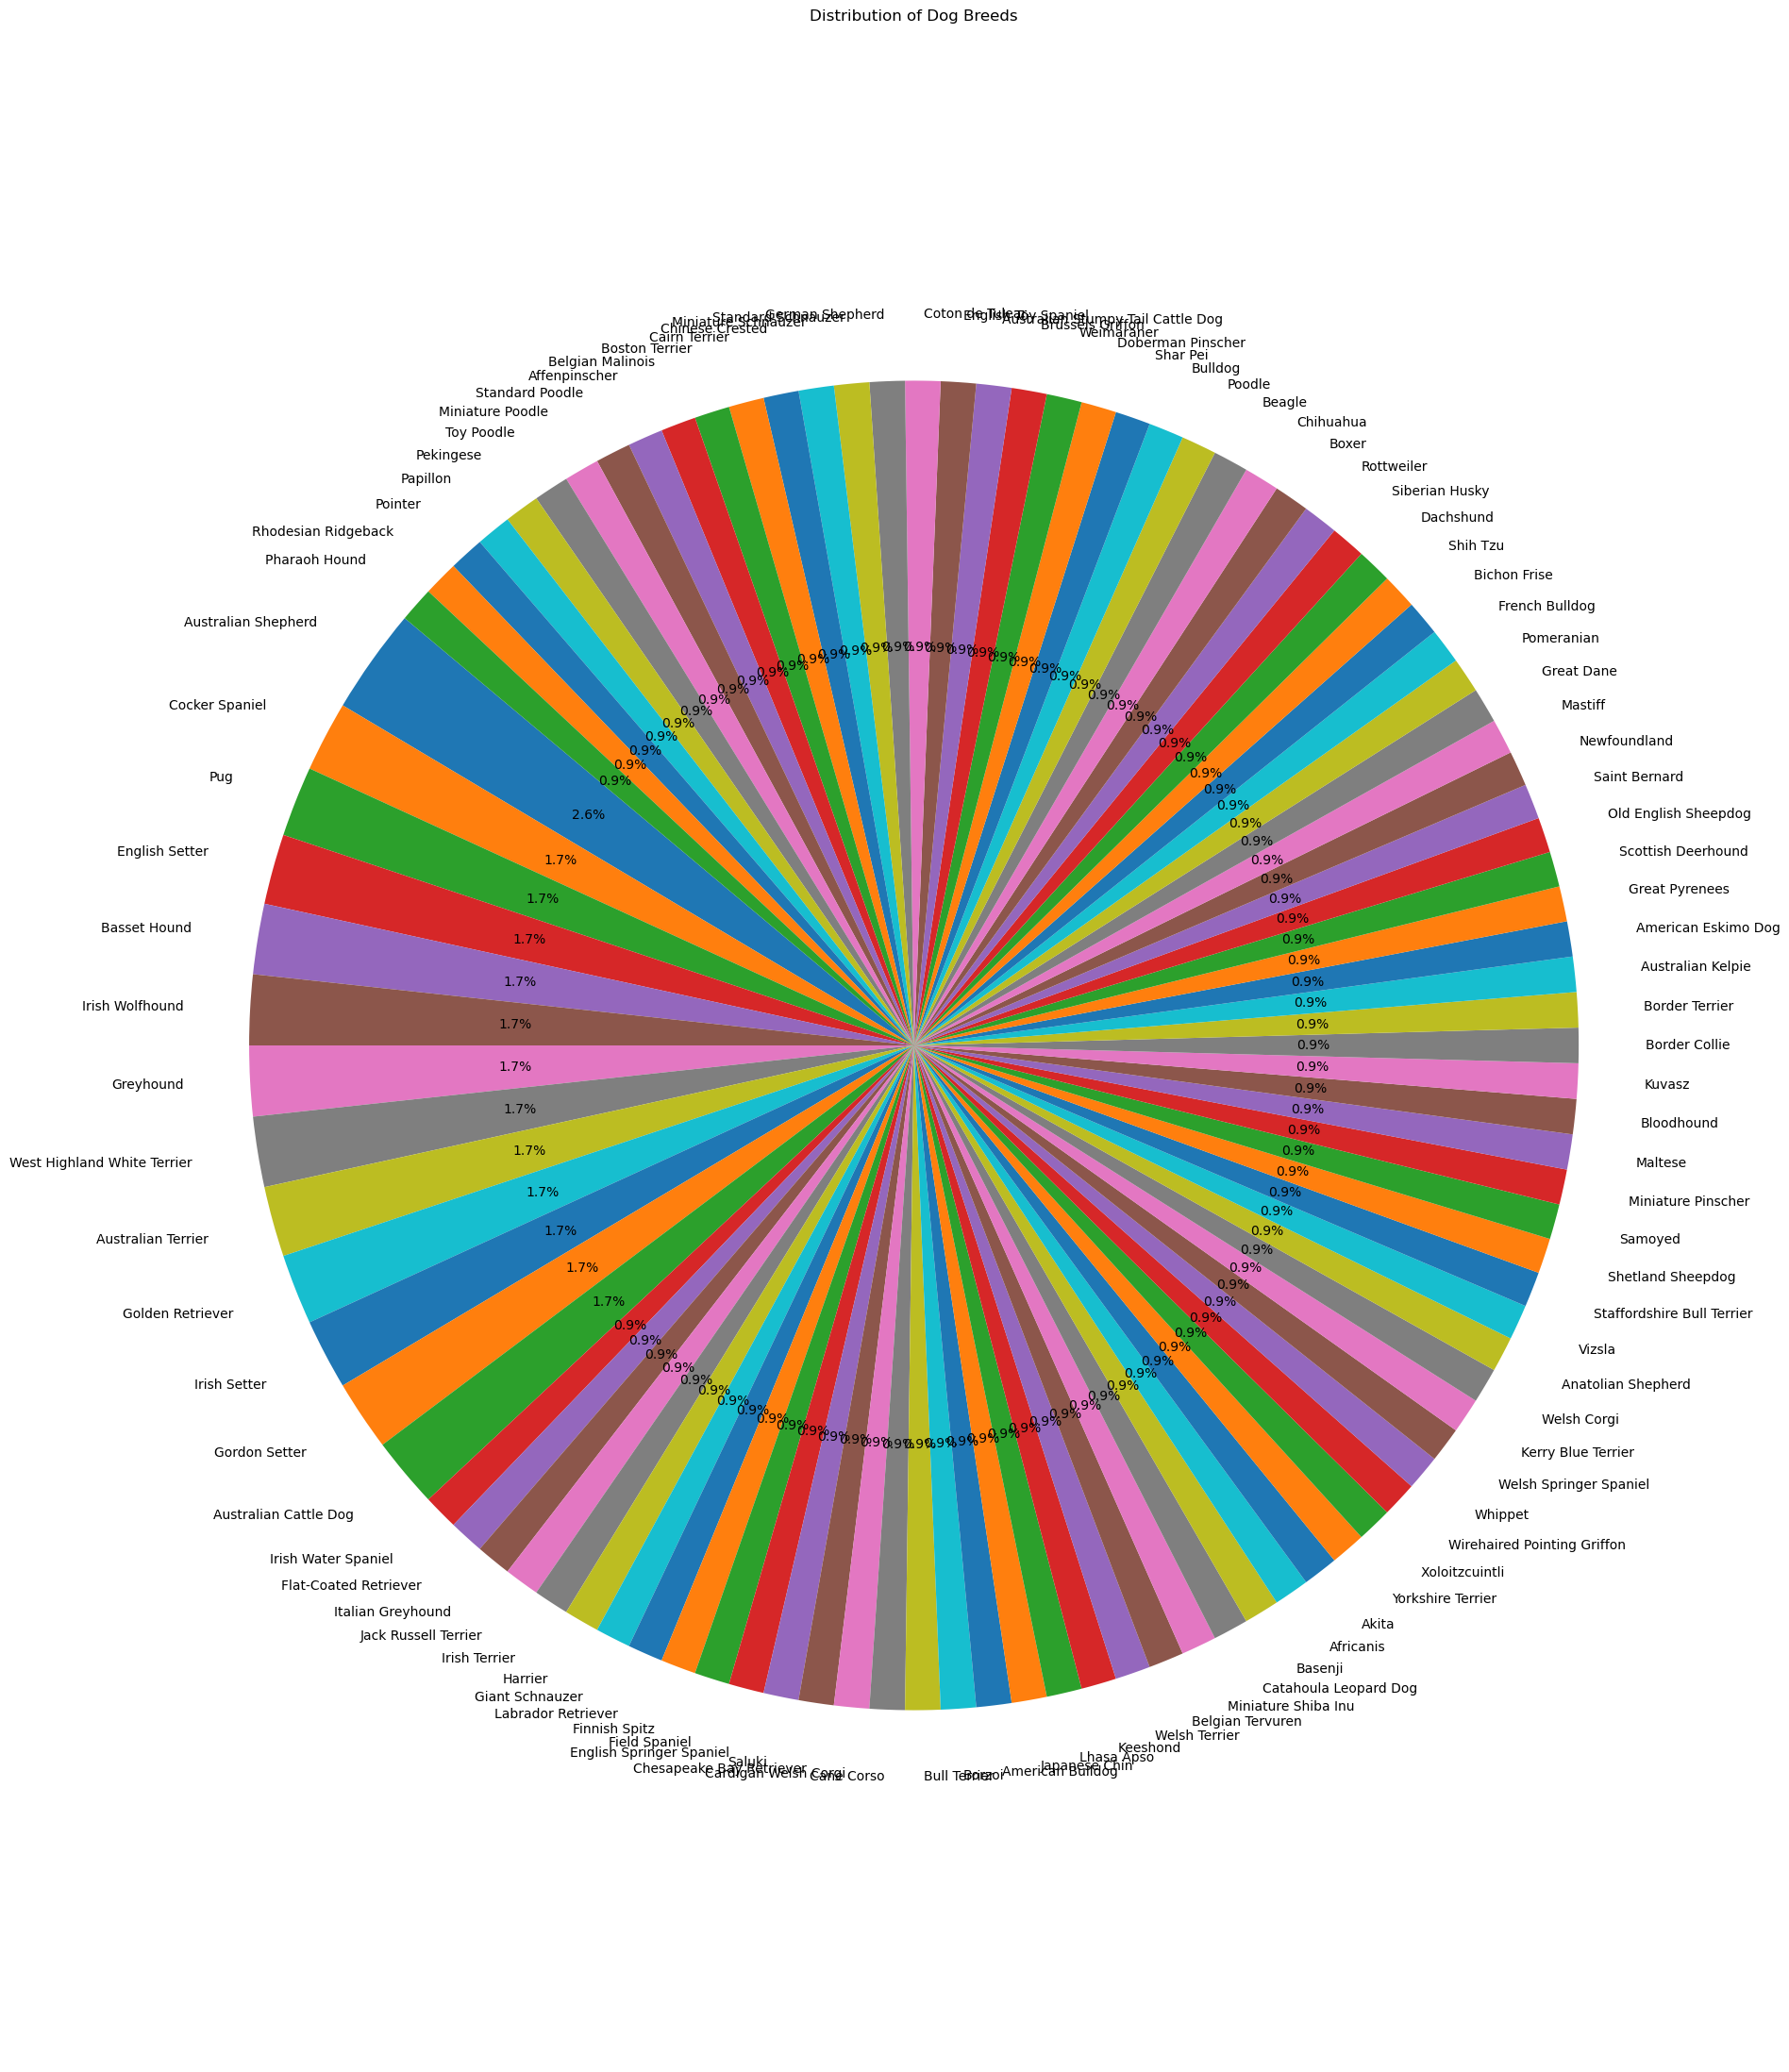

In [21]:
import matplotlib.pyplot as plt

# Count the occurrences of each breed
breed_counts = df['Breed'].value_counts()

# Plot the pie chart
plt.figure(figsize=(20, 28))
plt.pie(breed_counts, labels=breed_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Dog Breeds')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [22]:
# Perform one-hot encoding to convert categorical variables into numerical format
df_encoded = pd.get_dummies(df, drop_first=True)

# Perform Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df_encoded, min_support=0.1, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display the association rules
print(rules)


                                          antecedents  \
0                               (Color of Eyes_Brown)   
1                         (Country of Origin_England)   
2   (Character Traits_Intelligent, energetic, play...   
3                         (Country of Origin_England)   
4   (Common Health Problems_Dental problems, eye i...   
..                                                ...   
95  (Color of Eyes_Brown, Character Traits_Intelli...   
96                            (Longevity (yrs)_12-15)   
97  (Common Health Problems_Dental problems, eye i...   
98                              (Color of Eyes_Brown)   
99  (Character Traits_Intelligent, energetic, play...   

                                          consequents  antecedent support  \
0                         (Country of Origin_England)            0.923077   
1                               (Color of Eyes_Brown)            0.205128   
2                         (Country of Origin_England)            0.427350   
3   (Ch

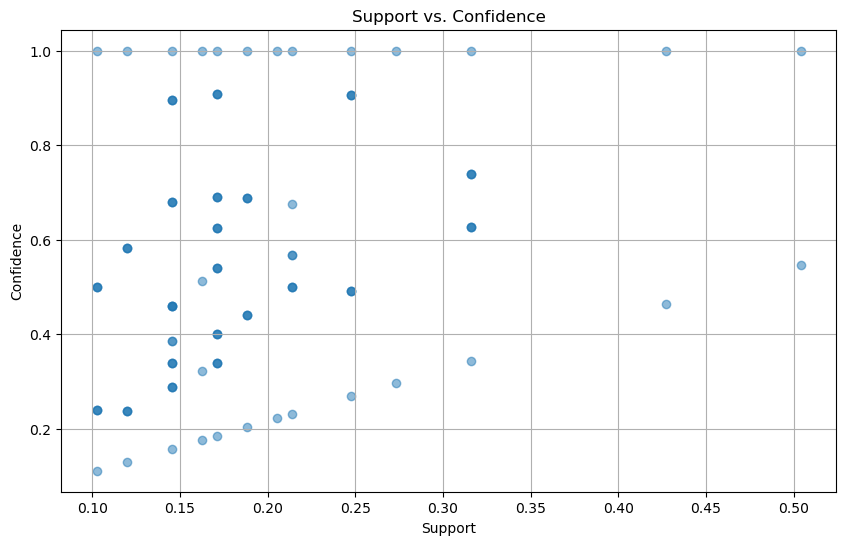

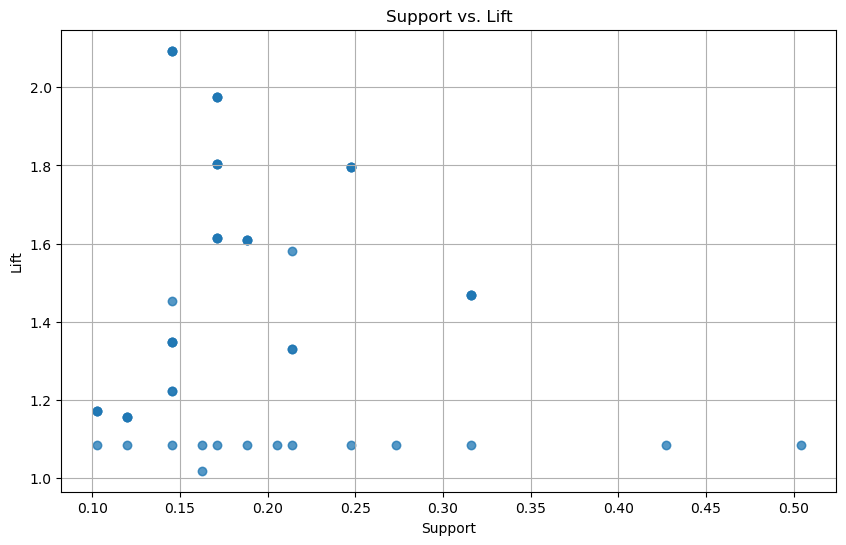

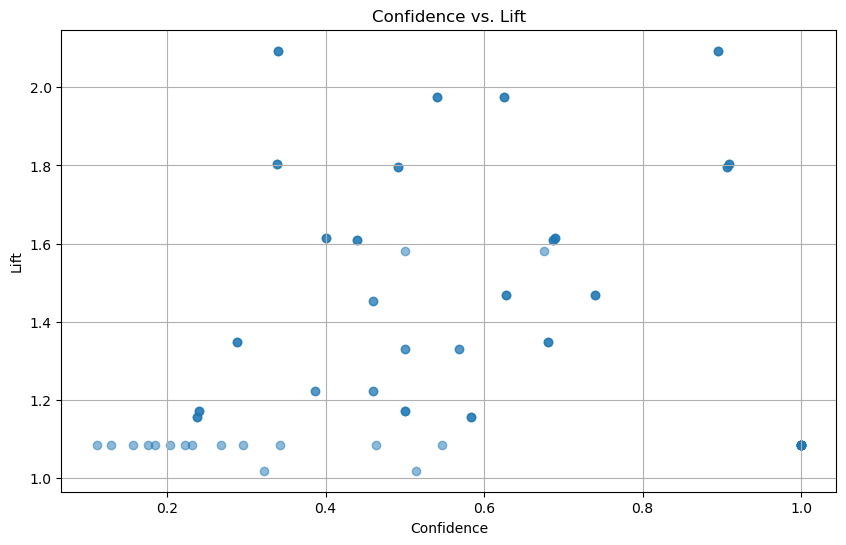

In [23]:
# Scatterplot for support vs. confidence
plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs. Confidence')
plt.grid(True)
plt.show()

# Scatterplot for support vs. lift
plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Lift')
plt.title('Support vs. Lift')
plt.grid(True)
plt.show()

# Scatterplot for confidence vs. lift
plt.figure(figsize=(10, 6))
plt.scatter(rules['confidence'], rules['lift'], alpha=0.5)
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.title('Confidence vs. Lift')
plt.grid(True)
plt.show()


In [25]:
# Perform one-hot encoding for categorical variables
df_encoded = pd.get_dummies(df)

# Convert string values to numeric format
df_numeric = df_encoded.apply(pd.to_numeric, errors='coerce')

# Drop any rows with missing values
df_numeric.dropna(inplace=True)

# Scale the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Create a list to store silhouette scores for different k values
kmeans_silhouette_scores = []

# Iterate over different values of k
for k in range(2, 6):
    # Apply K-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(df_scaled, kmeans.labels_)
    kmeans_silhouette_scores.append(silhouette_avg)
    
    print(f"For K = {k}, Silhouette Score = {silhouette_avg}")

# Find the optimal k for K-means
optimal_k_kmeans = kmeans_silhouette_scores.index(max(kmeans_silhouette_scores)) + 2
print(f"Optimal K for K-means: {optimal_k_kmeans}")


C:\Users\sawan\.conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sawan\.conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For K = 2, Silhouette Score = 0.15895068071114551


C:\Users\sawan\.conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sawan\.conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For K = 3, Silhouette Score = 0.1278592088397329


C:\Users\sawan\.conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sawan\.conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For K = 4, Silhouette Score = -0.019111895128338847


C:\Users\sawan\.conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sawan\.conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For K = 5, Silhouette Score = -0.0030966633604683123
Optimal K for K-means: 2


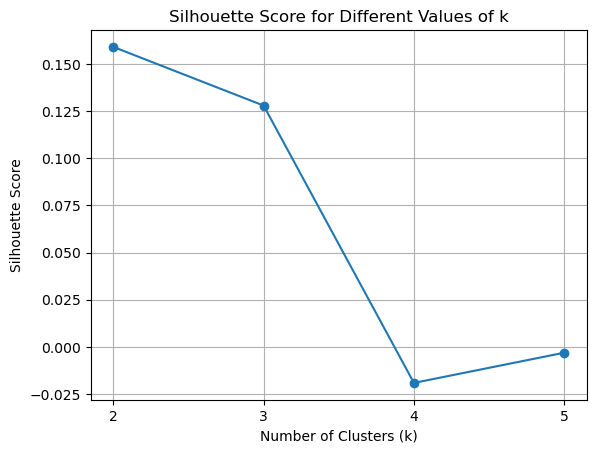

In [26]:
# Plot silhouette scores
plt.plot(range(2, 6), kmeans_silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Values of k')
plt.xticks(range(2, 6))
plt.grid(True)
plt.show()
